We are trying to produce a logistic regression model which will seperate input vectors depending on the (binary) category they most closely fall into.

To model output for any vector $X$, first we calculate the weighted sum of that vector $X$ with the weight vector $W$ and bias $b$. We will aim to determine the optimal values for W and b.

$$Z = WX + b$$

To ensure output is mapped to (0, 1), we use a sigmoid nonlinearity to compute the activation vector $A$ from the weighted sum $Z$:

$$A = g(Z) = \frac{1}{1 + e^{-Z}}$$

The loss function that we look to minimise is:

$$ J = \frac{1}{m} \sum_{i=1}^{m} \mathscr{L}^{(i)} $$

Where $\mathscr{L}$ is the cross-entropy loss function:

$$\mathscr{L} = -(y\ln{(A)} + (1 - y)\ln{(1 - A)})$$

Our aim to then to determine values for W and b such that this loss J is minimised.

To do this, we use the chain rule to find:

\begin{equation*}
\frac{\partial \mathscr{L}}{\partial W} = \frac{\partial \mathscr{L}}{\partial Z} \frac{\partial Z}{\partial w}
\tag{1}
\end{equation*}

\begin{equation*}
\frac{\partial \mathscr{L}}{\partial b} = \frac{d \mathscr{L}}{\partial Z} \frac{\partial Z}{\partial b}
\tag{2}
\end{equation*}

We now look to determine expressions for the above.

To do this we again use chain rule, this time on $\frac{\partial \mathscr{L}}{\partial Z}$. We find:

$$ \frac{\partial \mathscr{L}}{\partial Z} = \frac{\partial \mathscr{L}}{\partial A} \frac{\partial A}{\partial Z}  $$

We then find that the derivative of $\mathscr{L}$ with respect to $A$ is:

$$\frac{\partial \mathscr{L}}{\partial A} = \frac{-y}{a} + \frac{(1-y)}{(1-a)}$$

And that the partials of $A$ with respect to $Z$:

$$ \frac{\partial A}{\partial Z} = a(1 - a) $$

Therefore:

$$\begin{align*}
\frac{\partial \mathscr{L}}{\partial Z} & =  \frac{\partial \mathscr{L}}{\partial A} \frac{\partial A}{\partial Z} \\
& = -(\frac{y}{a} - \frac{(1 - y)}{(1 - 1)}) a(1 - a) \\
& = -y + a \\
& = a - y 
\end{align*} $$

Then we compute the partials of $Z$ with respect to $W$ and $b$:

$$\frac{\partial Z}{\partial W} = X$$
$$\frac{\partial Z}{\partial b} = 1$$


Now by returning to equations 1 and 2 and substituting what we have determined, we find the partials of the loss $\mathscr{L}$ with repect to $W$ and $b$:

$$ \frac{\partial \mathscr{L}}{\partial W} = \frac{\partial \mathscr{L}}{\partial Z} \frac{\partial Z}{\partial w} = x(A - y)$$
$$ \frac{\partial \mathscr{L}}{\partial b} = \frac{d \mathscr{L}}{\partial Z} \frac{\partial Z}{\partial b} = (A - y)$$


To determine the gradients with respect to the overall cost $J$ we simply average across the losses for each point in the set:

$$\frac{\partial J}{\partial W} = \frac{1}{m} \sum_{i=1}^{m} x^{(i)}(A^{(i)} - y^{(i)})$$

$$\frac{\partial J}{\partial b} = \frac{1}{m} \sum_{i=1}^{m} (A^{(i)} - y^{(i)})$$

These gradients point in the direction of increasing cost $J$. So to decrease the cost, we move $W$ and $b$ a small amount in the opposite directions of the gradients. Let:

$\alpha = $ learning rate, typically a small number like $0.001$

We modify $W$ and $b$ with these equations:

$$W = W - \alpha \frac{\partial J}{\partial W}$$

$$b = b - \alpha \frac{\partial J}{\partial b}$$

This is implemented logistic_fit method of the LogisticRegressionModel class in logistic_notebook_tob.py.

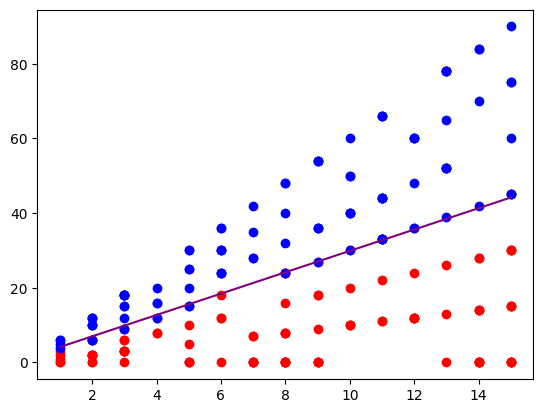

In [2]:
#%%
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd
import importlib
import logistic_regression_tob
importlib.reload(logistic_regression_tob)



#path = '/home/thomasobrien/dev/src/ml_foundations/archive/pima-indians-diabetes.csv'

delim, category = ',', 8
logistic_regression_model = logistic_regression_tob.LogisticRegressionModel(var_size=1)
xs, labels, x_0s, x_1s = logistic_regression_model.build_dataset(type="straight_line")
w, b = logistic_regression_model.logistic_fit(xs, labels, nepochs=32768)
#print("Best fit model: b: {}\tw: {}".format(b, w))

logistic_regression_model.plot_logistic_regression(xs, x_0s, x_1s)


